# Logistic Regression Precision / Recall Curve

In [14]:
%pylab inline
pylab.rcParams['figure.figsize'] = (17, 8)

import pickle
import pandas as pd
import seaborn as sns; sns.set_style("whitegrid")

repo_path = '/Users/alex/Documents/gslr/'
KEGG_path = repo_path + 'experiments/KEGG/KEGG_df.filtered.with_correlates.pickle'

# File was serialized like so: 
#   logit_pr_results = [(pathway_id, scores, classifier.coef_, classifier.Cs_), ...]
#   pickle.dump(results, open('logit_pr_results.pickle', 'wb'))

Populating the interactive namespace from numpy and matplotlib


## I. Extract Data

### i. Load data

In [2]:
nodes = pd.read_csv(repo_path + 'experiments/generated_data/4/hsa04110_inbiomap_exp.csv', index_col=0).columns

In [3]:
pathways_df = pd.read_pickle(KEGG_path)

pathways = {pathway_id: set(pathways_df.loc[pd.IndexSlice[:, :, [pathway_id]],['genes', 'correlates']].values[0][0]) for pathway_id in pathways_df.index.get_level_values(2)}

In [4]:
results = pickle.load(open('logit_l2_gmm_pr_results.pickle', 'rb'))

### ii. Define Precision and Recall

In [5]:
def recall(truth, pred):    
    return len(truth & pred) / float(len(truth))
    
def precision(truth, pred):
    if len(pred) == 0: return float(0)
    return len(truth & pred) / float(len(pred))

### iii. Retrieve Scores, Precisions, and Recalls for every pathway for every fold for every sparsity

In [6]:
scores = pd.DataFrame({pathway_id: {('fold_'+str(i), C): score for i, fold_scores in enumerate(scores[0]) for C, score in zip(Cs, fold_scores)} for pathway_id, scores, coefs, Cs in results})

scores.head()

hsa00970  hsa01521  hsa01522  hsa01523  hsa01524  hsa02010  \
fold_0 0.000100      0.55      0.40      0.60      0.35      0.45      0.60   
       0.000341      0.55      0.40      0.60      0.40      0.55      0.70   
       0.001166      0.65      0.40      0.60      0.55      0.60      0.70   
       0.003981      0.65      0.40      0.60      0.60      0.50      0.60   
       0.013594      0.65      0.45      0.55      0.60      0.50      0.65   

                 hsa03008  hsa03010  hsa03013  hsa03015    ...     hsa05322  \
fold_0 0.000100      0.45      0.65      0.65      0.55    ...         0.70   
       0.000341      0.50      0.75      0.70      0.60    ...         0.85   
       0.001166      0.50      0.85      0.70      0.70    ...         0.90   
       0.003981      0.60      0.85      0.75      0.70    ...         0.90   
       0.013594      0.70      0.85      0.75      0.70    ...         0.95   

                 hsa05323  hsa05330  hsa05332  hsa05340  hsa05410  hsa05412  \
fold_0 0.000100      0.75      0.65      0.50      0.55      0.75      0.70   
       0.000341      0.80      0.65      0.50      0.70      0.75      0.65   
       0.001166      0.80      0.75      0.65      0.75      0.75      0.75   
       0.003981      0.85      0.75      0.75      0.85      0.80      0.80   
       0.013594      0.85      0.75      0.75      0.80      0.80      0.80   

                 hsa05414  hsa05416  hsa05418  
fold_0 0.000100      0.65      0.75      0.90  
       0.000341      0.80      0.80      0.95  
       0.001166      0.90      0.85      1.00  
       0.003981      0.85      0.90      1.00  
       0.013594      0.85      0.90      1.00  

[5 rows x 229 columns]

In [18]:
recalls = pd.DataFrame({pathway_id: {('fold_'+str(i), C, k): recall(pathways[pathway_id], set(nodes[abs(coefs[:-1].argsort()[-k:])])) for i, fold_coefs in enumerate(coefs['negative']) for C, coefs in zip(Cs, fold_coefs) for k in [50, 100, 200, 300, 500, 1000]} for pathway_id, scores, coefs, Cs in results if len(pathways[pathway_id]) > 0})
recalls.head()

hsa00970  hsa02010  hsa03008  hsa03010  hsa03013  hsa03015  \
fold_0 0.0001 50   0.348485  0.090909  0.237624  0.235294  0.210526  0.307692   
              100  0.363636  0.090909  0.257426  0.313725  0.315789  0.417582   
              200  0.378788  0.090909  0.287129  0.333333  0.345029  0.461538   
              300  0.378788  0.090909  0.297030  0.346405  0.362573  0.461538   
              500  0.378788  0.090909  0.316832  0.352941  0.368421  0.461538   

                   hsa03018  hsa03020  hsa03022  hsa03030    ...     hsa05322  \
fold_0 0.0001 50   0.358974  0.322581  0.311111  0.222222    ...     0.210526   
              100  0.397436  0.322581  0.355556  0.250000    ...     0.233083   
              200  0.435897  0.322581  0.377778  0.250000    ...     0.248120   
              300  0.435897  0.322581  0.377778  0.250000    ...     0.248120   
              500  0.461538  0.322581  0.400000  0.277778    ...     0.248120   

                   hsa05323  hsa05330  hsa05332  hsa05340  hsa05410  hsa05412  \
fold_0 0.0001 50   0.277778  0.315789  0.121951  0.243243  0.349398  0.361111   
              100  0.277778  0.342105  0.121951  0.324324  0.385542  0.388889   
              200  0.288889  0.342105  0.121951  0.324324  0.409639  0.402778   
              300  0.300000  0.342105  0.121951  0.324324  0.409639  0.402778   
              500  0.300000  0.342105  0.121951  0.324324  0.409639  0.402778   

                   hsa05414  hsa05416  hsa05418  
fold_0 0.0001 50   0.222222  0.389831  0.273381  
              100  0.233333  0.389831  0.352518  
              200  0.233333  0.389831  0.359712  
              300  0.244444  0.406780  0.366906  
              500  0.244444  0.406780  0.366906  

[5 rows x 225 columns]

In [19]:
precisions = pd.DataFrame({pathway_id: {('fold_'+str(i), C, k): precision(pathways[pathway_id], set(nodes[abs(coefs[:-1].argsort()[-k:])])) for i, fold_coefs in enumerate(coefs['negative']) for C, coefs in zip(Cs, fold_coefs) for k in [50, 100, 200, 300, 500, 1000]} for pathway_id, scores, coefs, Cs in results if len(pathways[pathway_id]) > 0})
precisions.head()

hsa00970  hsa02010  hsa03008  hsa03010  hsa03013  hsa03015  \
fold_0 0.0001 50   0.460000  0.080000     0.480  0.720000  0.720000     0.560   
              100  0.240000  0.040000     0.260  0.480000  0.540000     0.380   
              200  0.125000  0.020000     0.145  0.255000  0.295000     0.210   
              300  0.083333  0.013333     0.100  0.176667  0.206667     0.140   
              500  0.050000  0.008000     0.064  0.108000  0.126000     0.084   

                   hsa03018  hsa03020  hsa03022  hsa03030    ...     hsa05322  \
fold_0 0.0001 50   0.560000  0.200000  0.280000     0.160    ...        0.560   
              100  0.310000  0.100000  0.160000     0.090    ...        0.310   
              200  0.170000  0.050000  0.085000     0.045    ...        0.165   
              300  0.113333  0.033333  0.056667     0.030    ...        0.110   
              500  0.072000  0.020000  0.036000     0.020    ...        0.066   

                   hsa05323  hsa05330  hsa05332  hsa05340  hsa05410  hsa05412  \
fold_0 0.0001 50      0.500  0.240000  0.100000     0.180  0.580000  0.520000   
              100     0.250  0.130000  0.050000     0.120  0.320000  0.280000   
              200     0.130  0.065000  0.025000     0.060  0.170000  0.145000   
              300     0.090  0.043333  0.016667     0.040  0.113333  0.096667   
              500     0.054  0.026000  0.010000     0.024  0.068000  0.058000   

                   hsa05414  hsa05416  hsa05418  
fold_0 0.0001 50   0.400000     0.460     0.760  
              100  0.210000     0.230     0.490  
              200  0.105000     0.115     0.250  
              300  0.073333     0.080     0.170  
              500  0.044000     0.048     0.102  

[5 rows x 225 columns]

## II. Construct Precision/Recall curve for these data

In [22]:
recalls = recalls.stack().unstack(level=2)
precisions = precisions.stack().unstack(level=2)
recalls.head()

50        100       200       300       500   \
fold_0 0.0001 hsa00970  0.348485  0.363636  0.378788  0.378788  0.378788   
              hsa02010  0.090909  0.090909  0.090909  0.090909  0.090909   
              hsa03008  0.237624  0.257426  0.287129  0.297030  0.316832   
              hsa03010  0.235294  0.313725  0.333333  0.346405  0.352941   
              hsa03013  0.210526  0.315789  0.345029  0.362573  0.368421   

                            1000  
fold_0 0.0001 hsa00970  0.378788  
              hsa02010  0.090909  
              hsa03008  0.316832  
              hsa03010  0.352941  
              hsa03013  0.374269

In [32]:
recalls = recalls.swaplevel().swaplevel(i=0,j=1).sortlevel().groupby(level=[0,1]).max()
precisions = precisions.swaplevel().swaplevel(i=0,j=1).sortlevel().groupby(level=[0,1]).max()
precisions.head()

/Users/alex/Documents/proteomics/venv/lib/python3.6/site-packages/ipykernel/__main__.py:2: FutureWarning: sortlevel is deprecated, use sort_index(level= ...)
  from ipykernel import kernelapp as app


50    100    200       300    500    1000
hsa00970 fold_0   0.5  0.25  0.125  0.083333  0.050  0.025
         fold_1   0.5  0.25  0.125  0.083333  0.050  0.026
         fold_2   0.5  0.25  0.125  0.083333  0.050  0.026
         fold_3   0.5  0.25  0.125  0.083333  0.052  0.026
         fold_4   0.5  0.25  0.125  0.083333  0.050  0.025

(0.0, 1.0)

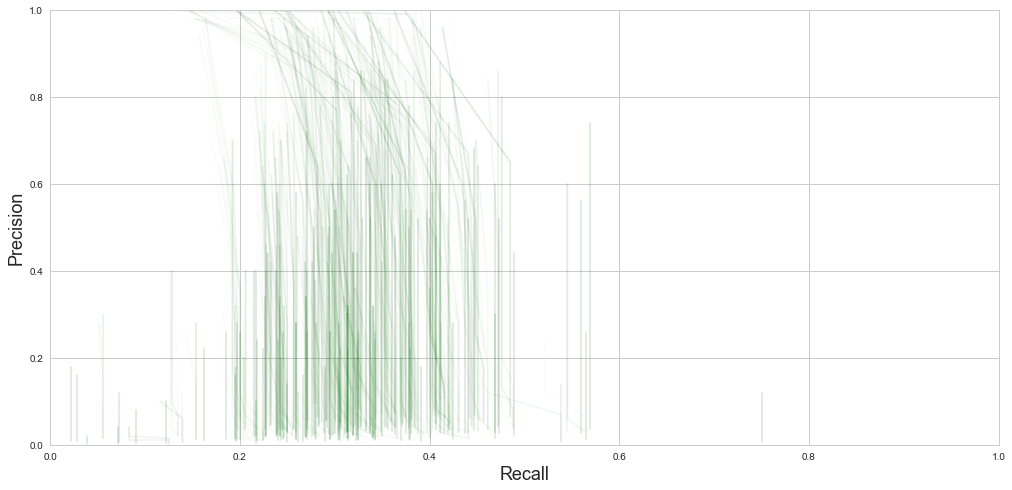

In [34]:
lines = [plt.plot(recalls.iloc[k].values, precisions.iloc[k].values, c='g', alpha=0.01) for k in range(len(recalls))]
# [add_arrow(line, color='b') for line in flatten(lines)]

# plt.annotate(arrowprops=dict(arrowstyle='->'))
plt.xlabel('Recall', fontsize=18)
plt.ylabel('Precision', fontsize=18)
plt.ylim([0.0, 1.0])
plt.xlim([0.0, 1.0])

In [35]:
scores.to_pickle('logit_l2_gmm_pr_scores.pickle')
recalls.to_pickle('logit_l2_gmm_pr_recalls.pickle')
precisions.to_pickle('logit_l2_gmm_pr_precisions.pickle')

# Appendix

In [11]:
def add_arrow(line, position=None, direction='right', size=15, color=None):
    """
    add an arrow to a line.

    line:       Line2D object
    position:   x-position of the arrow. If None, mean of xdata is taken
    direction:  'left' or 'right'
    size:       size of the arrow in fontsize points
    color:      if None, line color is taken.
    """
    if color is None:
        color = line.get_color()

    xdata = line.get_xdata()
    ydata = line.get_ydata()

    if position is None:
        position = xdata.mean()
    # find closest index
    start_ind = np.argmin(np.absolute(xdata - position))
    if direction == 'right':
        end_ind = start_ind + 1
    else:
        end_ind = start_ind - 1

    line.axes.annotate('',
        xytext=(xdata[start_ind], ydata[start_ind]),
        xy=(xdata[end_ind], ydata[end_ind]),
        arrowprops=dict(arrowstyle="->", color=color),
        size=size
    )